In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
num_symbols = 1001
sps = 8 #samples per symbol
fs = 1e6

bits = np.random.randint(0, 2, num_symbols) # Our data to be transmitted, 1's and 0's

In [3]:
x = np.array([])
for bit in bits:
    pulse = np.zeros(sps)
    pulse[0] = bit*2-1 # set the first value to either a 1 or -1
    x = np.concatenate((x, pulse)) # add the 8 samples to the signal


In [4]:
# Create our raised-cosine filter
num_taps = 101
beta = 0.35
Ts = sps # Assume sample rate is 1 Hz, so sample period is 1, so *symbol* period is 8
t = np.arange(-50, 51) # remember it's not inclusive of final number
h = np.sinc(t/Ts) * np.cos(np.pi*beta*t/Ts) / (1 - (2*beta*t/Ts)**2)


In [5]:
# Filter our signal, in order to apply the pulse shaping
x_shaped = np.convolve(x, h)


In [6]:
# apply a freq offset
fs = 1e6 # assume our sample rate is 1 MHz
fo = 500 # simulate freq offset
Ts = 1/fs # calc sample period
t = np.arange(0, Ts*len(x_shaped), Ts) # create time vector
samples = x_shaped * np.exp(1j*2*np.pi*fo*t) # perform freq shift


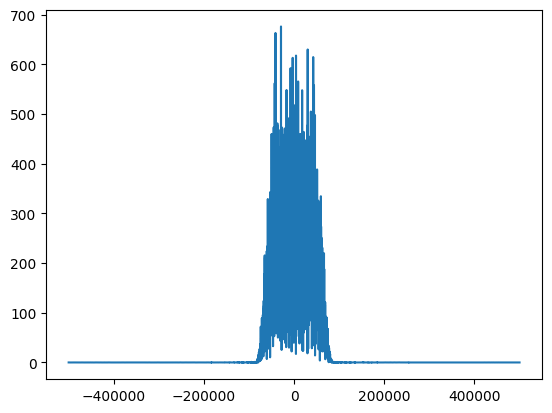

In [7]:
psd = np.fft.fftshift(np.abs(np.fft.fft(samples)))
f = np.linspace(-fs/2.0, fs/2.0, len(psd))
plt.plot(f, psd)
plt.show()


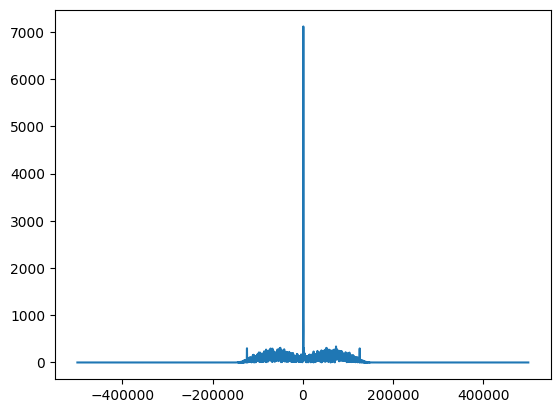

In [8]:
# square the signal
samples = samples**2

psd = np.fft.fftshift(np.abs(np.fft.fft(samples)))
f = np.linspace(-fs/2.0, fs/2.0, len(psd))
plt.plot(f, psd)
plt.show()


In [9]:
i = np.argmax(psd)
f_offset = f[i]/2
print(f_offset)


524.2383125693887


# References
- [ ] [coarse_freq_sync.py](https://gitlab.eurecom.fr/florian.kaltenberger/comlab/-/blob/main/coarse_freq_sync.py)